# Analisis Sentimental a la Data de Starbucks + Clasificacion de valores en Variables Dummy

In [5]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def process_sentiment_starbucks(input_filepath, output_filepath, output_dummy_filepath):
    # Cargar el archivo .parquet en un DataFrame de Pandas
    df_reviews = pd.read_parquet(input_filepath)
    
    # Eliminar las columnas 'review_id' y 'user_id'
    df_reviews.drop(columns=['review_id', 'user_id'], inplace=True)
    
    # Descargar el lexicón de VADER si no está disponible
    nltk.download('vader_lexicon')
    
    # Inicializar el analizador de sentimientos
    sia = SentimentIntensityAnalyzer()
    
    # Función para clasificar el sentimiento
    def classify_sentiment(text):
        scores = sia.polarity_scores(text)
        if scores['compound'] >= 0.05:
            return 2  # Positivo
        elif scores['compound'] <= -0.05:
            return 0  # Negativo
        else:
            return 1  # Neutral
    
    # Aplicar la función a la columna 'text'
    df_reviews['sentiment'] = df_reviews['text'].apply(classify_sentiment)
    
    # Guardar el DataFrame con los sentimientos clasificados como archivo Parquet
    df_reviews.to_parquet(output_filepath)
    
    # Crear variables dummy para los sentimientos
    df_reviews['positive'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 2 else 0)
    df_reviews['neutral'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 1 else 0)
    df_reviews['negative'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 0 else 0)
    
    # Eliminar la columna 'sentiment' si no se necesita
    df_reviews.drop(columns=['sentiment'], inplace=True)
    
    # Eliminar las columnas 'text' y 'date'
    df_reviews.drop(columns=['text', 'date'], inplace=True)
    
    # Crear columnas totales para positive, neutral y negative antes de agrupar
    df_reviews['positive_total'] = df_reviews.groupby('business_id')['positive'].transform('sum')
    df_reviews['neutral_total'] = df_reviews.groupby('business_id')['neutral'].transform('sum')
    df_reviews['negative_total'] = df_reviews.groupby('business_id')['negative'].transform('sum')
    
    # Agrupar por la columna 'business_id' y calcular el valor promedio de las columnas relevantes
    df_reviews_grouped = df_reviews.groupby('business_id').agg({
        'stars': 'mean',
        'useful': 'mean',
        'funny': 'mean',
        'cool': 'mean',
        'positive': 'mean',
        'neutral': 'mean',
        'negative': 'mean',
        'positive_total': 'sum',  # Sumar los valores totales
        'neutral_total': 'sum',   # Sumar los valores totales
        'negative_total': 'sum'   # Sumar los valores totales
    }).reset_index()
    
    # Guardar el DataFrame agrupado como archivo Parquet
    df_reviews_grouped.to_parquet(output_dummy_filepath)

In [6]:
# uso de la Funcion
input_filepath = '../gcp/reviews_starbucks.parquet'
output_filepath = '../gcp/reviews_starbucks_as.parquet'
output_dummy_filepath = '../gcp/reviews_starbucks_as_dummy.parquet'
process_sentiment_starbucks(input_filepath, output_filepath, output_dummy_filepath)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhcat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Analisis Sentimental a la Data de Dunkin + Clasificacion de valores en Variables Dummy

In [10]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def process_sentiment_dunkin(input_filepath, output_filepath, output_dummy_filepath):
    # Cargar el archivo .parquet en un DataFrame de Pandas
    df_reviews = pd.read_parquet(input_filepath)
    
    # Eliminar las columnas 'review_id' y 'user_id'
    df_reviews.drop(columns=['review_id', 'user_id'], inplace=True)
    
    # Descargar el lexicón de VADER si no está disponible
    nltk.download('vader_lexicon')
    
    # Inicializar el analizador de sentimientos
    sia = SentimentIntensityAnalyzer()
    
    # Función para clasificar el sentimiento
    def classify_sentiment(text):
        scores = sia.polarity_scores(text)
        if scores['compound'] >= 0.05:
            return 2  # Positivo
        elif scores['compound'] <= -0.05:
            return 0  # Negativo
        else:
            return 1  # Neutral
    
    # Aplicar la función a la columna 'text'
    df_reviews['sentiment'] = df_reviews['text'].apply(classify_sentiment)
    
    # Guardar el DataFrame con los sentimientos clasificados como archivo Parquet
    df_reviews.to_parquet(output_filepath)
    
    # Crear variables dummy para los sentimientos
    df_reviews['positive'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 2 else 0)
    df_reviews['neutral'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 1 else 0)
    df_reviews['negative'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 0 else 0)
    
    # Eliminar la columna 'sentiment' si no se necesita
    df_reviews.drop(columns=['sentiment'], inplace=True)
    
    # Eliminar las columnas 'text' y 'date'
    df_reviews.drop(columns=['text', 'date'], inplace=True)
    
    # Crear columnas totales para positive, neutral y negative antes de agrupar
    df_reviews['positive_total'] = df_reviews.groupby('business_id')['positive'].transform('sum')
    df_reviews['neutral_total'] = df_reviews.groupby('business_id')['neutral'].transform('sum')
    df_reviews['negative_total'] = df_reviews.groupby('business_id')['negative'].transform('sum')
    
    # Agrupar por la columna 'business_id' y calcular el valor promedio de las columnas relevantes
    df_reviews_grouped = df_reviews.groupby('business_id').agg({
        'stars': 'mean',
        'useful': 'mean',
        'funny': 'mean',
        'cool': 'mean',
        'positive': 'mean',
        'neutral': 'mean',
        'negative': 'mean',
        'positive_total': 'sum',  # Sumar los valores totales
        'neutral_total': 'sum',   # Sumar los valores totales
        'negative_total': 'sum'   # Sumar los valores totales
    }).reset_index()
    
    # Guardar el DataFrame agrupado como archivo Parquet
    df_reviews_grouped.to_parquet(output_dummy_filepath)

In [13]:
# uso de la Funcion
input_filepath = '../gcp/reviews_dunkin.parquet'
output_filepath = '../gcp/review_dunkin_as.parquet'
output_dummy_filepath = '../gcp/reviews_dunkin_as_dummy.parquet'
process_sentiment_dunkin(input_filepath, output_filepath, output_dummy_filepath)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhcat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Estudios de relacion Starbucks Dunkin con el uso de distintos modelos de ML

## Análisis de Sentimientos, Starbucks vs Dunkin

In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.express as px

# Descargar recursos de NLTK (si no los tienes descargados previamente)
nltk.download('vader_lexicon')

# Cargar datos desde archivos Parquet de negocios
df_business_starbucks = pd.read_parquet('../gcp/business_starbucks.parquet')
df_business_dunkin = pd.read_parquet('../gcp/business_dunkin.parquet')

# Cargar datos desde archivos Parquet de revisiones
df_reviews_starbucks = pd.read_parquet('../gcp/reviews_starbucks.parquet')
df_reviews_dunkin = pd.read_parquet('../gcp/reviews_dunkin.parquet')

# Unir datos de negocios y revisiones por business_id
df_starbucks = pd.merge(df_reviews_starbucks, df_business_starbucks, on='business_id')
df_dunkin = pd.merge(df_reviews_dunkin, df_business_dunkin, on='business_id')

# Función para analizar sentimientos utilizando NLTK Vader
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score['compound']

# Aplicar análisis de sentimientos a cada revisión
df_starbucks['sentiment_score'] = df_starbucks['text'].apply(analyze_sentiment)
df_dunkin['sentiment_score'] = df_dunkin['text'].apply(analyze_sentiment)

# Agrupar por estado y calcular el promedio del sentimiento
starbucks_sentiment_by_state = df_starbucks.groupby('state')['sentiment_score'].mean().reset_index()
dunkin_sentiment_by_state = df_dunkin.groupby('state')['sentiment_score'].mean().reset_index()

# Visualización usando Plotly
fig = px.bar(starbucks_sentiment_by_state, x='state', y='sentiment_score', color='state',
             title='Sentimiento promedio de las revisiones de Starbucks por estado')
fig.update_layout(xaxis_title='Estado', yaxis_title='Sentimiento promedio')
fig.show()

fig = px.bar(dunkin_sentiment_by_state, x='state', y='sentiment_score', color='state',
             title='Sentimiento promedio de las revisiones de Dunkin por estado')
fig.update_layout(xaxis_title='Estado', yaxis_title='Sentimiento promedio')
fig.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhcat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Este código  proporciona una buena base para comenzar con el análisis de sentimientos de las revisiones de usuarios de Starbucks y Dunkin', y visualizar cómo se perciben estas marcas en diferentes ubicaciones geográficas. 

## Comparacion de métricas claves de rendimiento entre Starbucks y Dunkin' en distintos estados

In [4]:
import pandas as pd
import plotly.express as px

# Cargar datos desde archivos Parquet de negocios
df_business_starbucks = pd.read_parquet('../gcp/business_starbucks.parquet')
df_business_dunkin = pd.read_parquet('../gcp/business_dunkin.parquet')

# Cantidad de locales por estado
starbucks_locations = df_business_starbucks.groupby('state')['business_id'].count().reset_index()
starbucks_locations.columns = ['state', 'number_of_locations']

dunkin_locations = df_business_dunkin.groupby('state')['business_id'].count().reset_index()
dunkin_locations.columns = ['state', 'number_of_locations']

# Promedio de calificaciones por estado
starbucks_avg_stars = df_business_starbucks.groupby('state')['stars'].mean().reset_index()
starbucks_avg_stars.columns = ['state', 'average_stars']

dunkin_avg_stars = df_business_dunkin.groupby('state')['stars'].mean().reset_index()
dunkin_avg_stars.columns = ['state', 'average_stars']

# Cantidad de revisiones por estado
starbucks_review_count = df_business_starbucks.groupby('state')['review_count'].sum().reset_index()
starbucks_review_count.columns = ['state', 'total_reviews']

dunkin_review_count = df_business_dunkin.groupby('state')['review_count'].sum().reset_index()
dunkin_review_count.columns = ['state', 'total_reviews']

# Unir todos los DataFrames en uno solo para Starbucks y Dunkin'
starbucks_kpis = pd.merge(starbucks_locations, starbucks_avg_stars, on='state')
starbucks_kpis = pd.merge(starbucks_kpis, starbucks_review_count, on='state')
starbucks_kpis['brand'] = 'Starbucks'

dunkin_kpis = pd.merge(dunkin_locations, dunkin_avg_stars, on='state')
dunkin_kpis = pd.merge(dunkin_kpis, dunkin_review_count, on='state')
dunkin_kpis['brand'] = 'Dunkin'

# Combinar los KPIs de Starbucks y Dunkin en un solo DataFrame
kpis_combined = pd.concat([starbucks_kpis, dunkin_kpis], ignore_index=True)

# Visualización usando Plotly
fig = px.bar(kpis_combined, x='state', y='number_of_locations', color='brand', barmode='group',
             title='Cantidad de locales por estado')
fig.update_layout(xaxis_title='Estado', yaxis_title='Cantidad de locales')
fig.show()

fig = px.bar(kpis_combined, x='state', y='average_stars', color='brand', barmode='group',
             title='Promedio de calificaciones por estado')
fig.update_layout(xaxis_title='Estado', yaxis_title='Promedio de calificaciones')
fig.show()

fig = px.bar(kpis_combined, x='state', y='total_reviews', color='brand', barmode='group',
             title='Cantidad de reviews por estado')
fig.update_layout(xaxis_title='Estado', yaxis_title='Cantidad de revisiones')
fig.show()


Este enfoque proporciona una comparación clara de los KPIs entre Starbucks y Dunkin' en distintos estados.

## Predecir la calificación promedio de las tiendas utilizando características como el sentimiento de las Reviews y la ubicación geográfica (state)

Dado que no tenemos datos financieros, la predicción se centrará en la satisfacción del cliente.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhcat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Error cuadrático medio: 0.2616888671875


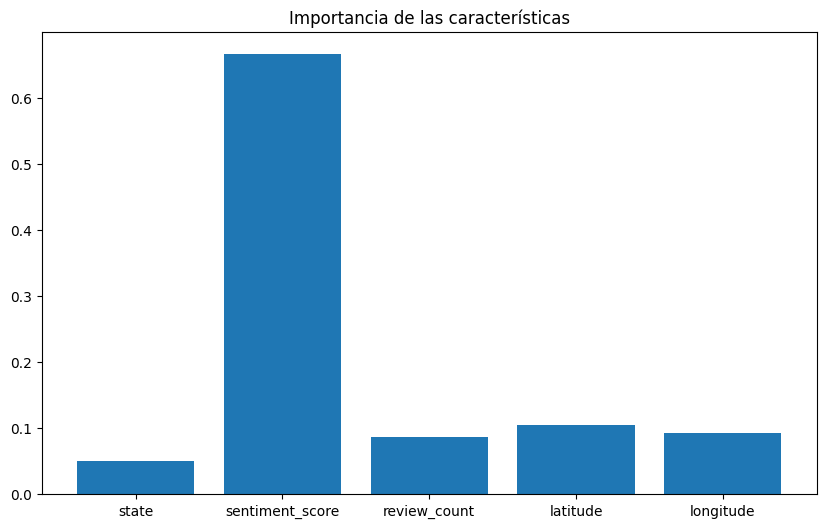

In [6]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Descargar recursos de NLTK (si no los tienes descargados previamente)
nltk.download('vader_lexicon')

# Cargar datos desde archivos Parquet de negocios
df_business_starbucks = pd.read_parquet('../gcp/business_starbucks.parquet')
df_business_dunkin = pd.read_parquet('../gcp/business_dunkin.parquet')

# Cargar datos desde archivos Parquet de revisiones
df_reviews_starbucks = pd.read_parquet('../gcp/reviews_starbucks.parquet')
df_reviews_dunkin = pd.read_parquet('../gcp/reviews_dunkin.parquet')

# Función para analizar sentimientos utilizando NLTK Vader
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score['compound']

# Aplicar análisis de sentimientos a cada revisión
df_reviews_starbucks['sentiment_score'] = df_reviews_starbucks['text'].apply(analyze_sentiment)
df_reviews_dunkin['sentiment_score'] = df_reviews_dunkin['text'].apply(analyze_sentiment)

# Calcular el promedio del sentimiento por negocio
starbucks_sentiment_avg = df_reviews_starbucks.groupby('business_id')['sentiment_score'].mean().reset_index()
dunkin_sentiment_avg = df_reviews_dunkin.groupby('business_id')['sentiment_score'].mean().reset_index()

# Unir el promedio del sentimiento con los datos de negocios
df_business_starbucks = pd.merge(df_business_starbucks, starbucks_sentiment_avg, on='business_id', how='left')
df_business_dunkin = pd.merge(df_business_dunkin, dunkin_sentiment_avg, on='business_id', how='left')

# Concatenar los datos de Starbucks y Dunkin'
df_combined = pd.concat([df_business_starbucks, df_business_dunkin], ignore_index=True)

# Preprocesamiento de los datos
df_combined['state'] = df_combined['state'].astype('category').cat.codes  # Convertir 'state' a numérico

# Seleccionar solo columnas numéricas para rellenar valores nulos
numeric_columns = df_combined.select_dtypes(include=['number']).columns
df_combined[numeric_columns] = df_combined[numeric_columns].fillna(df_combined[numeric_columns].mean())

# Características (features) y etiqueta (label)
X = df_combined[['state', 'sentiment_score', 'review_count', 'latitude', 'longitude']]
y = df_combined['stars']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

# Visualización de la importancia de las características
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.title('Importancia de las características')
plt.show()

El valor del error cuadrático medio (MSE) 0.2616888671875 es bastante bajo, lo que indica que el modelo está funcionando razonablemente bien para predecir las calificaciones promedio de las tienda

Este enfoque permite entender cómo ciertos factores (sentimiento de las revisiones, ubicación geográfica, etc.) afectan la calificación promedio de las tiendas de Starbucks y Dunkin'.

### Agregamos Más Características: Transformamos las categorías en variables dummies y las incluimos en el modelo, Usamos GridSearchCV para buscar los mejores hiperparámetros para los modelos de Random Forest, Gradient Boosting, y XGBoost, Evaluamos el rendimiento de diferentes modelos de regresión y comparamos sus errores cuadrados medios.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhcat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Random Forest - Mejor parámetro: {'max_depth': 10, 'n_estimators': 100}, Error cuadrático medio: 0.24349170299093037
Gradient Boosting - Mejor parámetro: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}, Error cuadrático medio: 0.23072915557975615
XGBoost - Mejor parámetro: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}, Error cuadrático medio: 0.2282315935100639


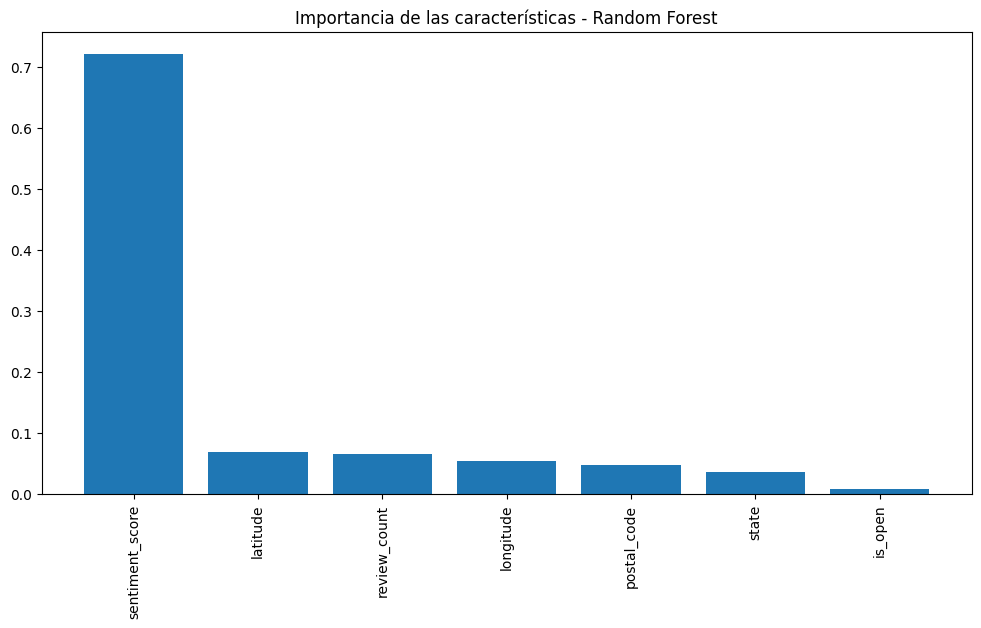

In [9]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Descargar recursos de NLTK (si no los tienes descargados previamente)
nltk.download('vader_lexicon')

# Cargar datos desde archivos Parquet de negocios
df_business_starbucks = pd.read_parquet('../gcp/business_starbucks.parquet')
df_business_dunkin = pd.read_parquet('../gcp/business_dunkin.parquet')

# Cargar datos desde archivos Parquet de revisiones
df_reviews_starbucks = pd.read_parquet('../gcp/reviews_starbucks.parquet')
df_reviews_dunkin = pd.read_parquet('../gcp/reviews_dunkin.parquet')

# Función para analizar sentimientos utilizando NLTK Vader
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score['compound']

# Aplicar análisis de sentimientos a cada revisión
df_reviews_starbucks['sentiment_score'] = df_reviews_starbucks['text'].apply(analyze_sentiment)
df_reviews_dunkin['sentiment_score'] = df_reviews_dunkin['text'].apply(analyze_sentiment)

# Calcular el promedio del sentimiento por negocio
starbucks_sentiment_avg = df_reviews_starbucks.groupby('business_id')['sentiment_score'].mean().reset_index()
dunkin_sentiment_avg = df_reviews_dunkin.groupby('business_id')['sentiment_score'].mean().reset_index()

# Unir el promedio del sentimiento con los datos de negocios
df_business_starbucks = pd.merge(df_business_starbucks, starbucks_sentiment_avg, on='business_id', how='left')
df_business_dunkin = pd.merge(df_business_dunkin, dunkin_sentiment_avg, on='business_id', how='left')

# Concatenar los datos de Starbucks y Dunkin'
df_combined = pd.concat([df_business_starbucks, df_business_dunkin], ignore_index=True)

# Preprocesamiento de los datos
df_combined['state'] = df_combined['state'].astype('category').cat.codes  # Convertir 'state' a numérico

# Convertir las categorías en variables dummies
df_combined = pd.get_dummies(df_combined, columns=['categories'], drop_first=True)

# Seleccionar solo columnas numéricas para rellenar valores nulos
numeric_columns = df_combined.select_dtypes(include=['number']).columns
df_combined[numeric_columns] = df_combined[numeric_columns].fillna(df_combined[numeric_columns].mean())

# Características (features) y etiqueta (label)
X = df_combined.select_dtypes(include=[np.number]).drop(columns=['stars'])
y = df_combined['stars']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Parámetros para GridSearchCV
params = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Entrenar y evaluar los modelos
best_models = {}
for name, model in models.items():
    grid = GridSearchCV(model, params[name], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - Mejor parámetro: {grid.best_params_}, Error cuadrático medio: {mse}")

# Visualización de la importancia de las características para el mejor modelo (Random Forest)
best_rf = best_models['Random Forest']
importances = best_rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importancia de las características - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

El valor del error cuadrático medio (MSE) 0.2282315935100639 es mucho mas bajo, lo que indica que el modelo está funcionando razonablemente bien para predecir las calificaciones promedio de las tienda y es una clara mejora sobre el modelo anterior.

## Agrupación y Segmentación

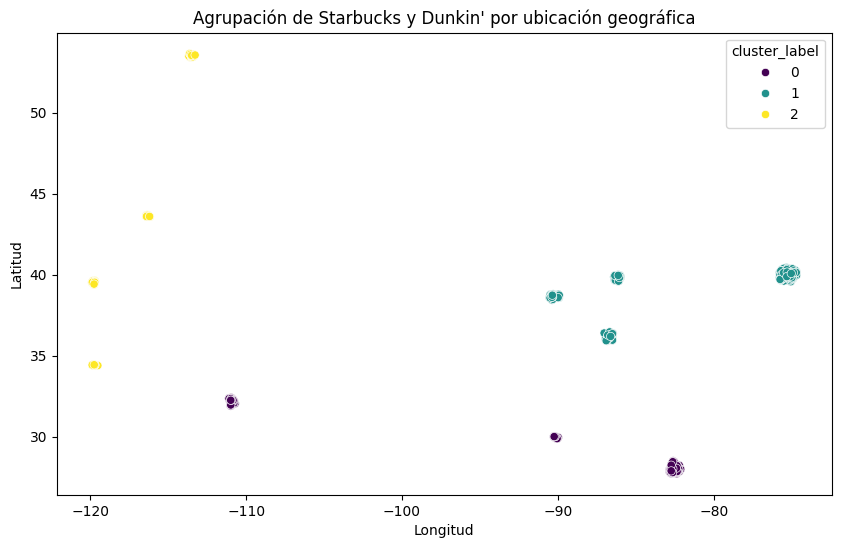

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde archivos Parquet de negocios
df_business_starbucks = pd.read_parquet('../gcp/business_starbucks.parquet')
df_business_dunkin = pd.read_parquet('../gcp/business_dunkin.parquet')

# Concatenar los datos de Starbucks y Dunkin'
df_combined = pd.concat([df_business_starbucks, df_business_dunkin], ignore_index=True)

# Preprocesamiento de los datos (ejemplo)
# Aquí se asume que se ha realizado el preprocesamiento necesario como en ejemplos anteriores

# Estandarización de las características relevantes para clustering
scaler = StandardScaler()
X_clustering = df_combined[['latitude', 'longitude']]
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Aplicación de K-Means para clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_clustering_scaled)

# Asegurar que df_combined y kmeans.labels_ tengan la misma longitud
if len(df_combined) == len(kmeans.labels_):
    df_combined['cluster_label'] = kmeans.labels_
else:
    print("Error: Los tamaños de los datos no coinciden.")

# Visualización de resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster_label', data=df_combined, palette='viridis', legend='full')
plt.title('Agrupación de Starbucks y Dunkin\' por ubicación geográfica')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

## Análisis de Series Temporales

C:\Users\jhcat\AppData\Local\Temp\ipykernel_7668\1662737041.py:29: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



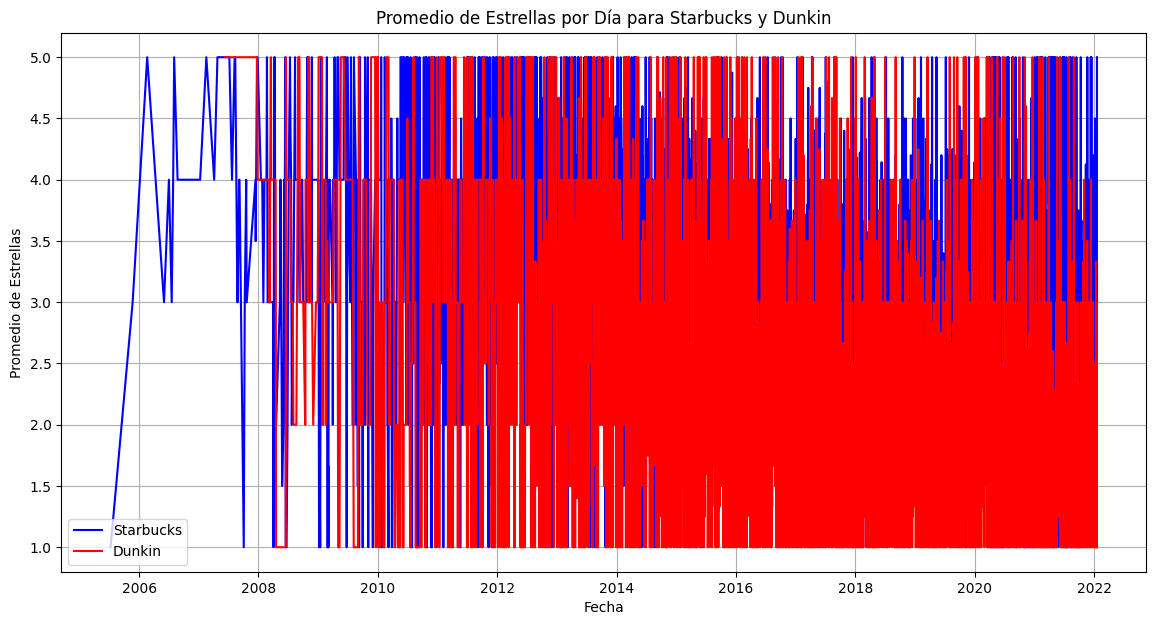

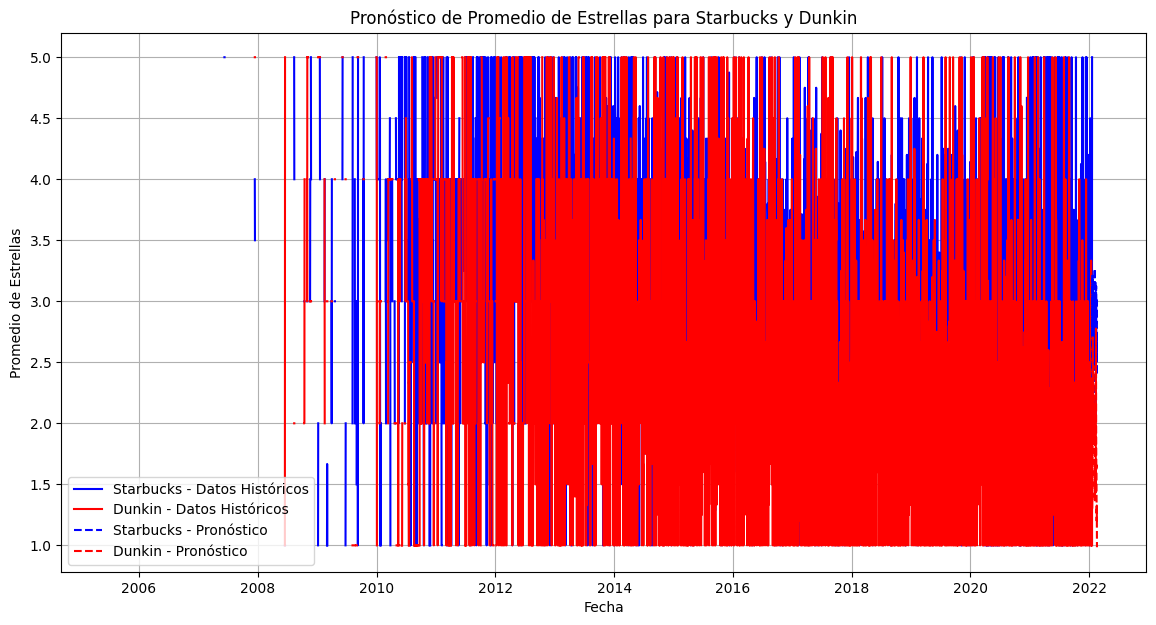

Mean Squared Error - Starbucks: 0.726692387973448
Mean Squared Error - Dunkin: 0.532782799393472


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Cargar datos
starbucks_path = '../gcp/reviews_starbucks.parquet'
dunkin_path = '../gcp/reviews_dunkin.parquet'

df_starbucks = pd.read_parquet(starbucks_path)
df_dunkin = pd.read_parquet(dunkin_path)

# Convertir columnas de fecha a datetime
df_starbucks['date'] = pd.to_datetime(df_starbucks['date'])
df_dunkin['date'] = pd.to_datetime(df_dunkin['date'])

# Filtrar y preparar datos
df_starbucks = df_starbucks[['date', 'stars']]
df_dunkin = df_dunkin[['date', 'stars']]

# Resamplear datos a diario, calculando la media de las estrellas
df_starbucks_daily = df_starbucks.groupby(df_starbucks['date'].dt.date).mean().rename(columns={'stars': 'avg_stars_starbucks'})
df_dunkin_daily = df_dunkin.groupby(df_dunkin['date'].dt.date).mean().rename(columns={'stars': 'avg_stars_dunkin'})

# Combinar datos de Starbucks y Dunkin'
df_combined = pd.merge(df_starbucks_daily, df_dunkin_daily, left_index=True, right_index=True, how='outer').fillna(method='ffill')

# Visualización de los datos
plt.figure(figsize=(14, 7))
plt.plot(df_combined.index, df_combined['avg_stars_starbucks'], label='Starbucks', color='blue')
plt.plot(df_combined.index, df_combined['avg_stars_dunkin'], label='Dunkin', color='red')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Estrellas')
plt.title('Promedio de Estrellas por Día para Starbucks y Dunkin')
plt.legend()
plt.grid(True)
plt.show()

# Transformar la serie temporal para modelar
df_combined.index = pd.to_datetime(df_combined.index)
df_combined = df_combined.asfreq('D')

# Ajustar modelos de Holt-Winters para ambas marcas
def fit_holt_winters(df, column):
    endog = df[column].dropna().values  # Eliminar valores NaN y convertir a numpy array
    model = ExponentialSmoothing(endog, trend="add", seasonal="add", seasonal_periods=365).fit()
    return model

model_starbucks = fit_holt_winters(df_combined, 'avg_stars_starbucks')
model_dunkin = fit_holt_winters(df_combined, 'avg_stars_dunkin')

# Predecir para los próximos 30 días
forecast_starbucks = model_starbucks.forecast(steps=30)
forecast_dunkin = model_dunkin.forecast(steps=30)

# Visualización de los resultados
plt.figure(figsize=(14, 7))
plt.plot(df_combined.index, df_combined['avg_stars_starbucks'], label='Starbucks - Datos Históricos', color='blue')
plt.plot(df_combined.index, df_combined['avg_stars_dunkin'], label='Dunkin - Datos Históricos', color='red')
plt.plot(pd.date_range(df_combined.index[-1], periods=31, freq='D')[1:], forecast_starbucks, label='Starbucks - Pronóstico', linestyle='--', color='blue')
plt.plot(pd.date_range(df_combined.index[-1], periods=31, freq='D')[1:], forecast_dunkin, label='Dunkin - Pronóstico', linestyle='--', color='red')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Estrellas')
plt.title('Pronóstico de Promedio de Estrellas para Starbucks y Dunkin')
plt.legend()
plt.grid(True)
plt.show()

# Evaluación del modelo
mse_starbucks = mean_squared_error(df_combined['avg_stars_starbucks'][-30:], forecast_starbucks)
mse_dunkin = mean_squared_error(df_combined['avg_stars_dunkin'][-30:], forecast_dunkin)
print(f'Mean Squared Error - Starbucks: {mse_starbucks}')
print(f'Mean Squared Error - Dunkin: {mse_dunkin}')

En resumen, los MSE proporcionan una medida cuantitativa de la precisión de las predicciones del modelo de Holt-Winters para ambas marcas. A partir de estos resultados, podemos concluir que el modelo tiene una capacidad predictiva relativamente buena para ambos casos, aunque es importante considerar estos valores en el contexto del problema específico y compararlos con otros modelos o métodos de evaluación para una validación más completa.